# Random forrest classifier for patient dataset

## Load our data and environment from `Data-pre-processing.ipynb`

In [1]:
%%capture
%run Data-pre-processing.ipynb

In [2]:
train

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
58446,40166,68493,176,87.0,37.664970,0,2,0,167.600006,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0,1
39507,107417,124638,199,56.0,31.506144,1,2,0,167.600006,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
8172,56424,46242,89,68.0,23.072186,1,2,0,162.600006,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4,0
85185,94204,11082,188,69.0,27.447725,0,2,0,167.600006,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6,0
27860,72715,88152,147,75.0,24.948097,0,2,1,170.000000,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75366,120284,122901,166,85.0,27.808533,0,2,0,155.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6,1
19145,49126,75091,161,43.0,29.197634,0,2,0,162.500000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4,0
8041,125259,74471,118,60.0,38.293205,0,0,1,182.899994,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
52241,69272,122563,26,27.0,24.547794,0,-1,0,154.899994,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4,0


## First Grid search

### Train final model

In [3]:
# Train model based on best estimated configuration from grid search
model = sklearn.ensemble.RandomForestClassifier(n_estimators=2000, min_samples_split=5, min_samples_leaf=4,
                                                max_features='sqrt', max_depth=None, bootstrap=True,
                                                criterion='gini', class_weight="balanced")
model = model.fit(X=train_x, y=train_y)
# Calculate train accuracy
train_accuracy = model.score(X=train_x, y=train_y)
print(f"Train accuracy {train_accuracy}")


Train accuracy 0.9943300414343126


In [4]:
# Create validation dataset
# val_x = val.drop(columns=['hospital_death'])
# val_y = val['hospital_death']
# Calculate train accuracy
val_accuracy = model.score(X=val_x, y=val_y)
print(f"Validation accuracy {val_accuracy}")


Validation accuracy 0.9271696467509812


In [5]:
# Create test dataset
# test_x = test.drop(columns=['hospital_death'])
# test_y = test['hospital_death']
# Calculate train accuracy
test_accuracy = model.score(X=test_x, y=test_y)
print(f"Test accuracy {test_accuracy}")


Test accuracy 0.9229678896581802


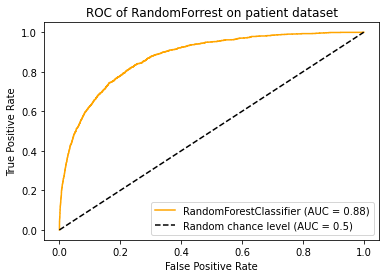

In [6]:
mutil.plot_roc(model, test_x, test_y, title="ROC of RandomForrest on patient dataset")


In [7]:
f1 = mutil.calc_f1(model, test_x, test_y)
print(f"Weighted F1-score = {f1}")

Weighted F1-score = 0.9107005142482614


In [8]:
pred_y = model.predict(test_x)
print(sklearn.metrics.classification_report(y_true=test_y, y_pred=pred_y))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16756
           1       0.61      0.30      0.40      1587

    accuracy                           0.92     18343
   macro avg       0.77      0.64      0.68     18343
weighted avg       0.91      0.92      0.91     18343



In [9]:
sklearn.metrics.confusion_matrix(test_y, pred_y)

array([[16454,   302],
       [ 1111,   476]], dtype=int64)